<a href="https://colab.research.google.com/github/Mritunjay1711/Snapchat_filter/blob/main/Snapchat_filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
pip install mtcnn

In [3]:
import numpy as np
import cv2
from mtcnn import MTCNN
import matplotlib.pyplot as plt

%matplotlib inline

Snapchat Filter

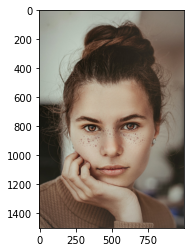

In [76]:
image = cv2.imread('Snapchat filter.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

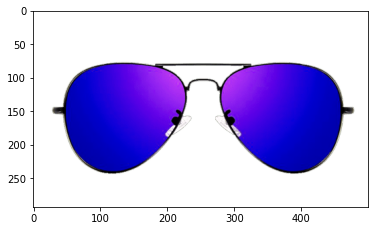

In [77]:
glasses = cv2.imread('goggles.png', -1)
plt.imshow(glasses)

Getting important facial points

In [78]:
mtcnn = MTCNN()

In [47]:
faces = mtcnn.detect_faces(image)
faces

[{'box': [177, 474, 602, 819],
  'confidence': 0.9996730089187622,
  'keypoints': {'left_eye': (357, 800),
   'mouth_left': (366, 1089),
   'mouth_right': (621, 1090),
   'nose': (500, 978),
   'right_eye': (636, 794)}}]

In [79]:
face = faces[0]
face

{'box': [177, 474, 602, 819],
 'confidence': 0.9996730089187622,
 'keypoints': {'left_eye': (357, 800),
  'mouth_left': (366, 1089),
  'mouth_right': (621, 1090),
  'nose': (500, 978),
  'right_eye': (636, 794)}}

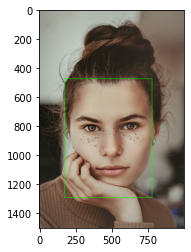

In [80]:
x, y, w, h = face['box']

temp_image = np.copy(image)

temp_image = cv2.rectangle(temp_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(temp_image)

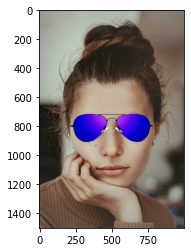

In [75]:
#Getting proper coordinates and superimpose filter image on the background image

background = np.copy(image)
img_filter = np.copy(glasses)

(x1, y1) , (x2, y2) = (face['keypoints']['left_eye'], face['keypoints']['right_eye'])


x1 -= 180
y1 -= 175
x2 += 180
y2 += 175

h = y2 - y1
w = x2 - x1

img_filter = cv2.resize(img_filter, (w, h))

alpha_filter = img_filter[:, :, 3] / 255.0
alpha_background = 1.0 - alpha_filter

for c in range(0, 3):
  background[y1:y2, x1:x2, c] = (alpha_filter * img_filter[:, :, c] + 
                                 alpha_background * background[y1:y2, x1:x2, c])
  

plt.imsave("final_image.png", background)
plt.imshow(background)